#Importing Libs and Dataset

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("LoanApprovalPrediction.csv")

data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Categorical Columns:

* Gender (Male/Female),
* Married (Yes/No),
* Number of dependents (Possible values:0,1,2,3+),
* Education (Graduate / Not Graduate),
* Self-Employed (No/Yes),
* credit history(Yes/No),
* Property Area (Rural/Semi-Urban/Urban) and
* Loan Status (Y/N)(i. e. Target variable)

Numerical Columns:

* Loan ID,
* Applicant Income,
* Co-applicant Income,
* Loan Amount, and
* Loan amount term

#Data preprocessing

Amount of columns of object datatype

In [ ]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


As Loan_ID is completely unique and not correlated with any of the other column

In [ ]:
data.drop(['Loan_ID'],axis = 1 , inplace=True)

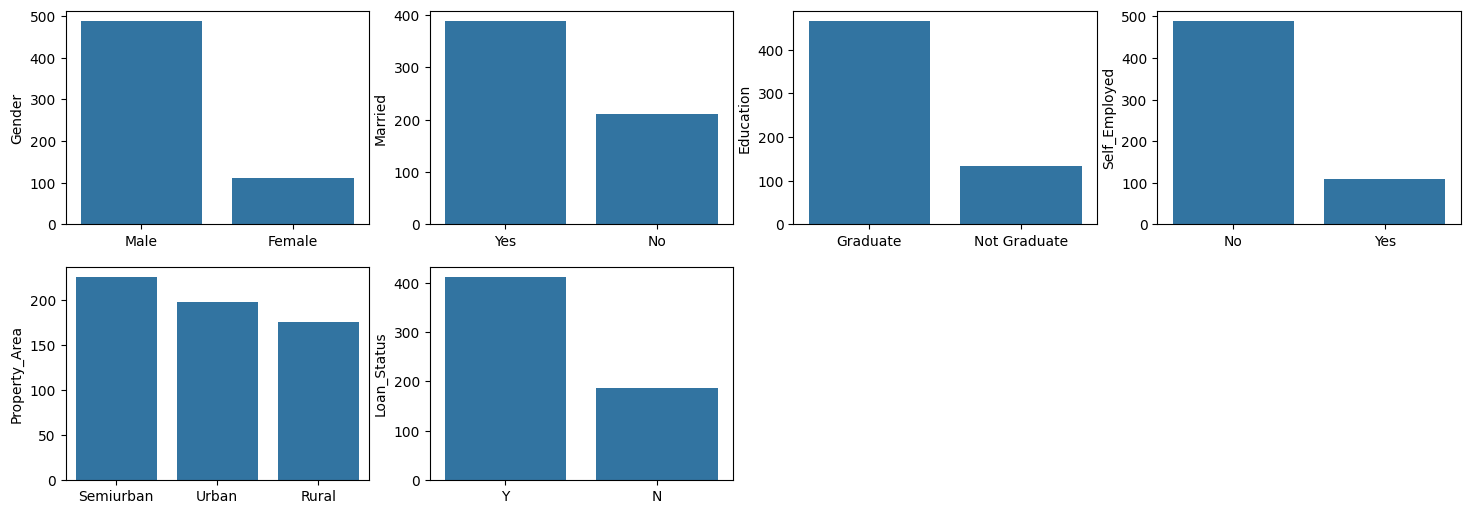

In [ ]:
obj=(data.dtypes=='object')
obj_columns=list(obj[obj].index)
plt.figure(figsize=(18,36))
i=1

for column in obj_columns:
  y = data[column].value_counts()
  plt.subplot(11,4,i)
  sns.barplot(x=list(y.index), y=y)
  i += 1

As all categorical values are binary so we can use Label Encoder for all such columns and the values will change into int.

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
obj=(data.dtypes == 'object')
for column in list(obj[obj].index):
  data[column] = label_encoder.fit_transform(data[column])

In [ ]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

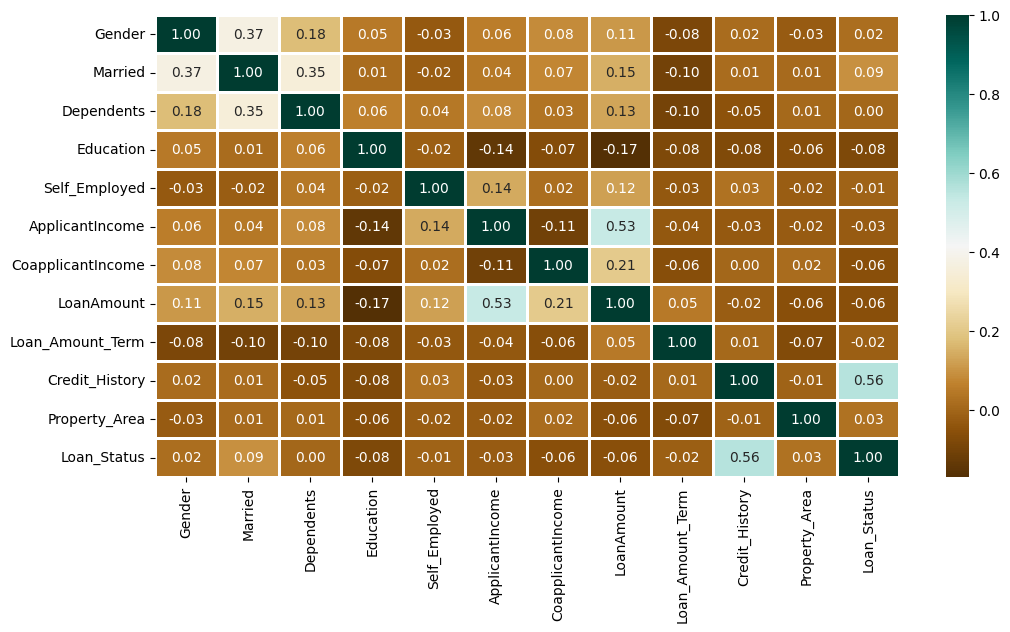

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f', linewidth=2,annot=True)

We see correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

Now we will use Catplot to visualize the plot for the Gender, and Marital Status of the applicant.

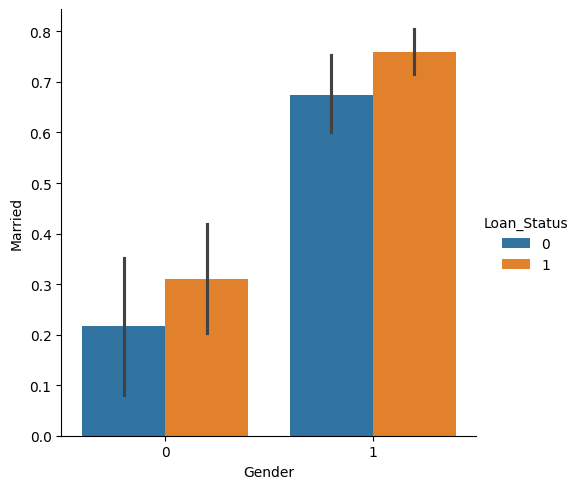

In [ ]:
sns.catplot(x="Gender" , y="Married" ,
            hue="Loan_Status",
            kind="bar",
            data=data)

In [ ]:
for column in data.columns:
  data[column] = data[column].fillna(data[column].mean())

data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We have no missing values so we should start training

#Model Trainingh

Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'], axis = 1)
y = data['Loan_Status']

X.shape,y.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((418, 11), (180, 11), (418,), (180,))

As this is a classification problem so we will be using these models :

* KNeighborsClassifiers
* RandomForestClassifiers
* Support Vector Classifiers (SVC)
* Logistics Regression

To predict the accuracy we will use the accuracy score function from scikit-learn library.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

KNN = KNeighborsClassifier(n_neighbors=3)
RFC = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state = 7)
SVC = SVC()
LC = LogisticRegression()

for model in (KNN, RFC, SVC, LC):
  model.fit(X_train,y_train)
  y_predicted = model.predict(X_test)
  print("Accuracy score of ",
          model.__class__.__name__,"=\n",
          metrics.accuracy_score(y_test, y_predicted))
  print("Confusion matrix of ",
          model.__class__.__name__,"=\n",
          metrics.confusion_matrix(y_test, y_predicted))
  print("Classification report of ",
          model.__class__.__name__,"=\n",
          metrics.classification_report(y_test, y_predicted))


Accuracy score of  KNeighborsClassifier =
 0.5833333333333334
Confusion matrix of  KNeighborsClassifier =
 [[ 6 48]
 [27 99]]
Classification report of  KNeighborsClassifier =
               precision    recall  f1-score   support

           0       0.18      0.11      0.14        54
           1       0.67      0.79      0.73       126

    accuracy                           0.58       180
   macro avg       0.43      0.45      0.43       180
weighted avg       0.53      0.58      0.55       180

Accuracy score of  RandomForestClassifier =
 0.7555555555555555
Confusion matrix of  RandomForestClassifier =
 [[ 29  25]
 [ 19 107]]
Classification report of  RandomForestClassifier =
               precision    recall  f1-score   support

           0       0.60      0.54      0.57        54
           1       0.81      0.85      0.83       126

    accuracy                           0.76       180
   macro avg       0.71      0.69      0.70       180
weighted avg       0.75      0.76      

#Feature importances

<Axes: >

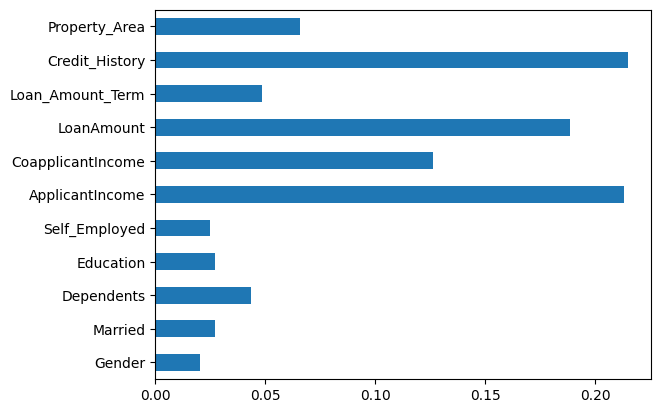

In [ ]:
(pd.Series(RFC.feature_importances_, index=X_train.columns).plot(kind='barh'))


#Conclusion :
Logistic Regression is giving the best accuracy with an accuracy score of 82% for the testing dataset. And to get much better results ensemble learning techniques like Bagging and Boosting can also be used.
